In [1]:
from experiment.experiment import Experiment
from envs.bandits import BanditFactory
from algorithms.algorithms import AlgorithmFactory

In [2]:
from algorithms.uniform import Uniform
from algorithms.ecolog import ECOLOG
from algorithms.max_uncertainty import MaxUncertainty
from algorithms.lucb import LUCB
from algorithms.ecots import EcoTS
from algorithms.toptwots import TopTwoTS

from envs.guassian_bandit import GuassianBandit
from envs.adv4_bandit import Adv4Bandit
from envs.adv_ttts import AdvTTTS

In [3]:
uniform_factory = AlgorithmFactory(Uniform, "uniform", [])
ecots_factory_001 = AlgorithmFactory(EcoTS, "ecots", ["param_norm_ub"], inflation=1)
toptwots_factory_01 = AlgorithmFactory(
    TopTwoTS, "toptwots", ["param_norm_ub"], inflation=1
)
maxuncertainty_factory = AlgorithmFactory(
    MaxUncertainty, "max_uncertainty", ["param_norm_ub"]
)
ecolog_factory = AlgorithmFactory(ECOLOG, "ecolog", ["param_norm_ub"], inflation=1)

guassian_factory = BanditFactory(
    GuassianBandit,
    "guassian",
    n_arms=20,
    n_contexts=20,
    d=15,
    fit_into_unit_ball=True,
)
ttts_breaker_factory = BanditFactory(
    AdvTTTS,
    "TTSBreaker",
    n_arms=3,
    n_contexts=1,
    d=2,
)
adv_factory = BanditFactory(
    Adv4Bandit,
    "needle",
    n_arms=70,
    n_contexts=400,
    d=30,
    fit_into_unit_ball=True,
)
experiment = Experiment(
    [
        ttts_breaker_factory,
        # ttts_breaker_factory,
        # adv_factory,
    ],
    [
        uniform_factory,
        maxuncertainty_factory,
        ecots_factory_001,
        toptwots_factory_01,
        ecolog_factory,
    ],
)

In [4]:
from experiment.simple_regret import SimpleRegret
from experiment.action_tracker import ActionTracker
from experiment.theta_tracker import ThetaTracker

simple_regret_callback = SimpleRegret(interval=100)
action_tracker_callback = ActionTracker()
theta_tracker_callback = ThetaTracker(interval=10, style="together")

experiment.add_callback(simple_regret_callback)
experiment.add_callback(action_tracker_callback)
experiment.add_callback(theta_tracker_callback)

Finished run 1 of 50 for TTSBreaker in 4.134897947311401 seconds
Finished run 2 of 50 for TTSBreaker in 8.350090980529785 seconds
Finished run 3 of 50 for TTSBreaker in 12.620292901992798 seconds
Finished run 4 of 50 for TTSBreaker in 16.681593894958496 seconds
Finished run 5 of 50 for TTSBreaker in 20.914885997772217 seconds
Finished run 6 of 50 for TTSBreaker in 25.0828959941864 seconds
Finished run 7 of 50 for TTSBreaker in 29.18924593925476 seconds
Finished run 8 of 50 for TTSBreaker in 33.29955697059631 seconds
Finished run 9 of 50 for TTSBreaker in 37.412102937698364 seconds
Finished run 10 of 50 for TTSBreaker in 41.5387749671936 seconds
Finished run 11 of 50 for TTSBreaker in 45.81957697868347 seconds
Finished run 12 of 50 for TTSBreaker in 50.039302110672 seconds
Finished run 13 of 50 for TTSBreaker in 54.01340675354004 seconds
Finished run 14 of 50 for TTSBreaker in 58.17466998100281 seconds
Finished run 15 of 50 for TTSBreaker in 62.45655012130737 seconds
Finished run 16 of 

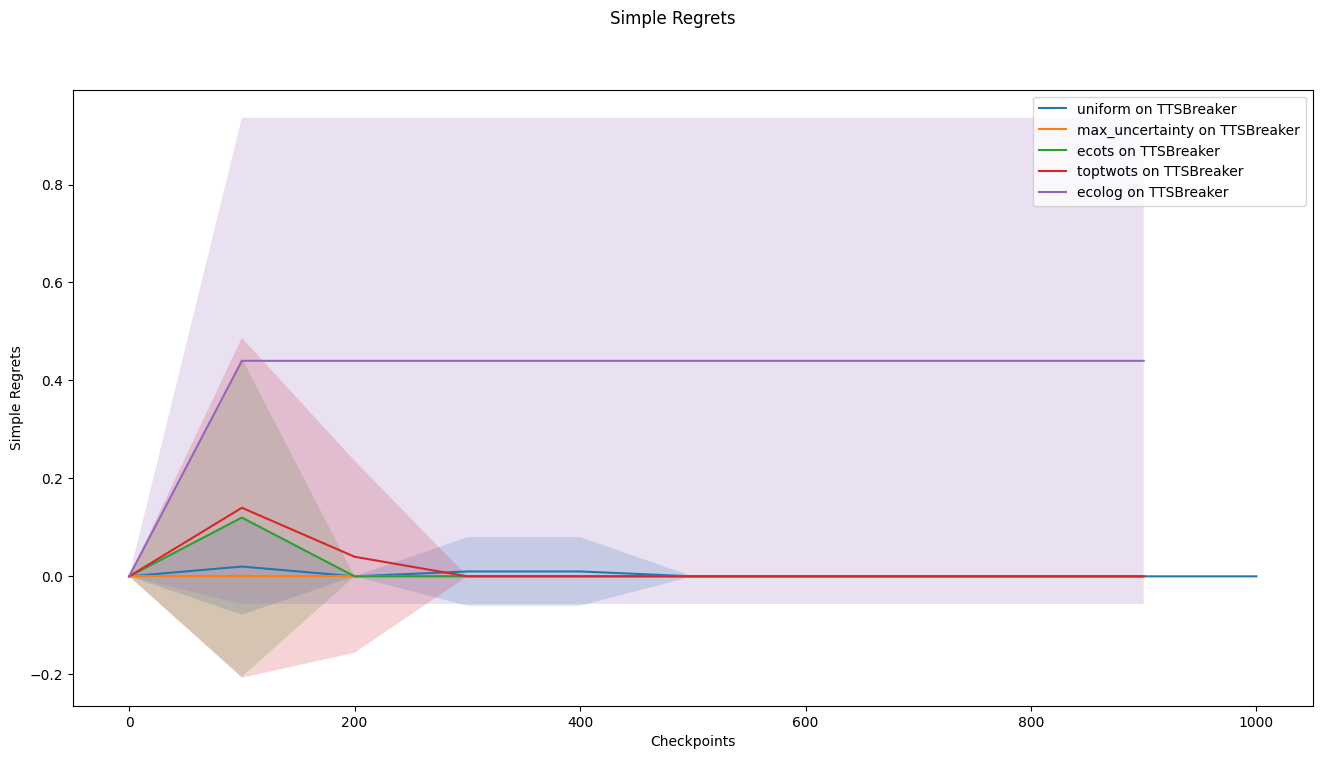

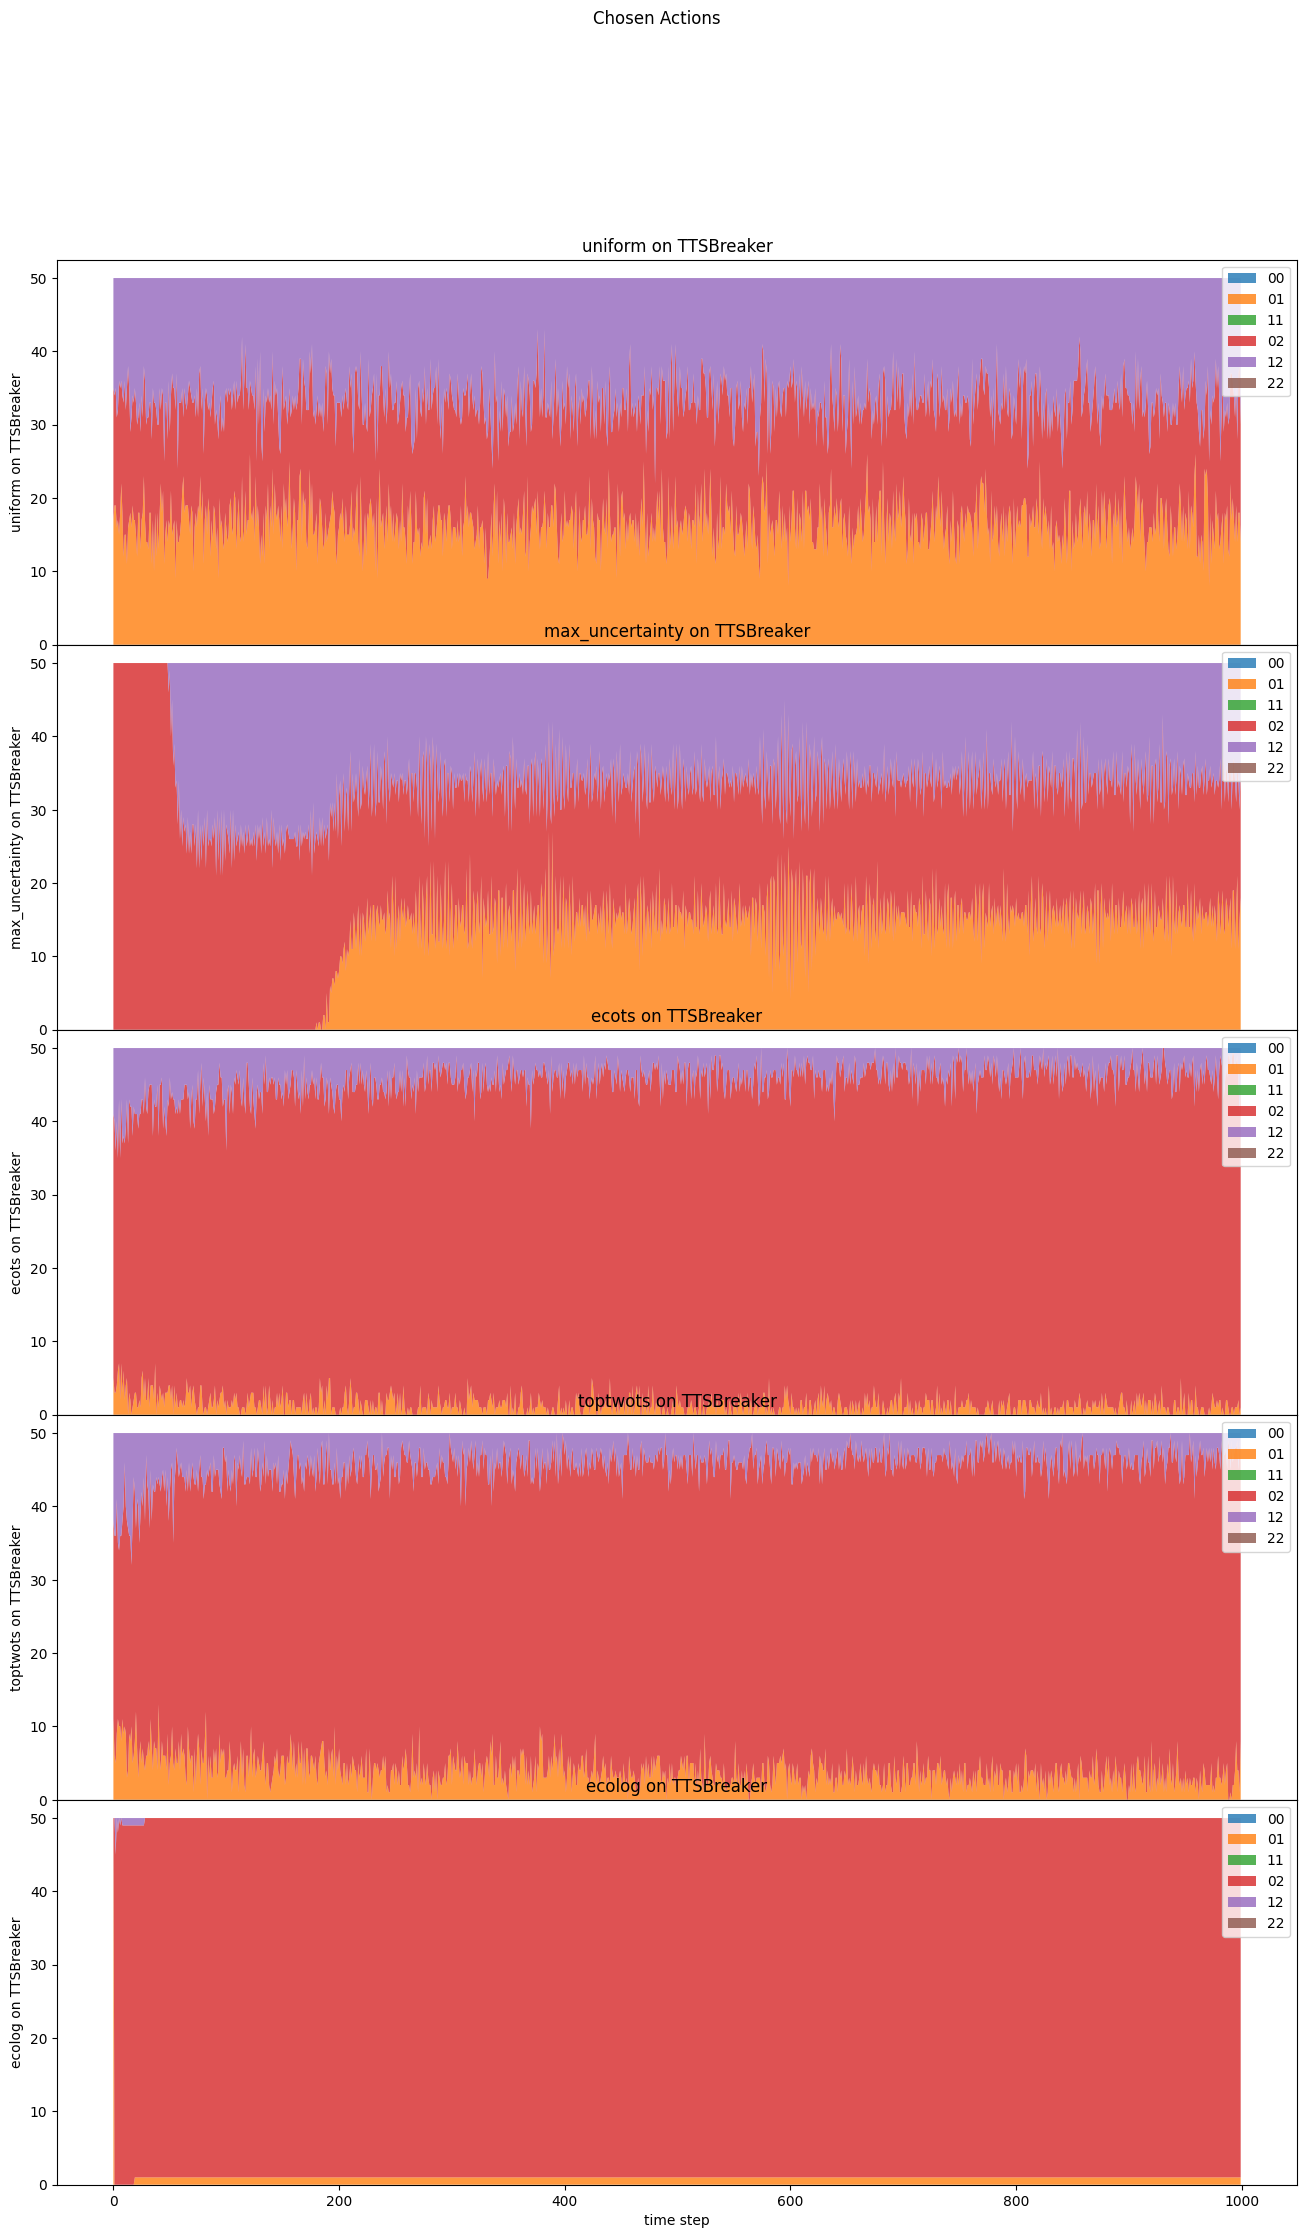

/Users/sarb/Desktop/ttts/experiment/theta_tracker.py:112: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


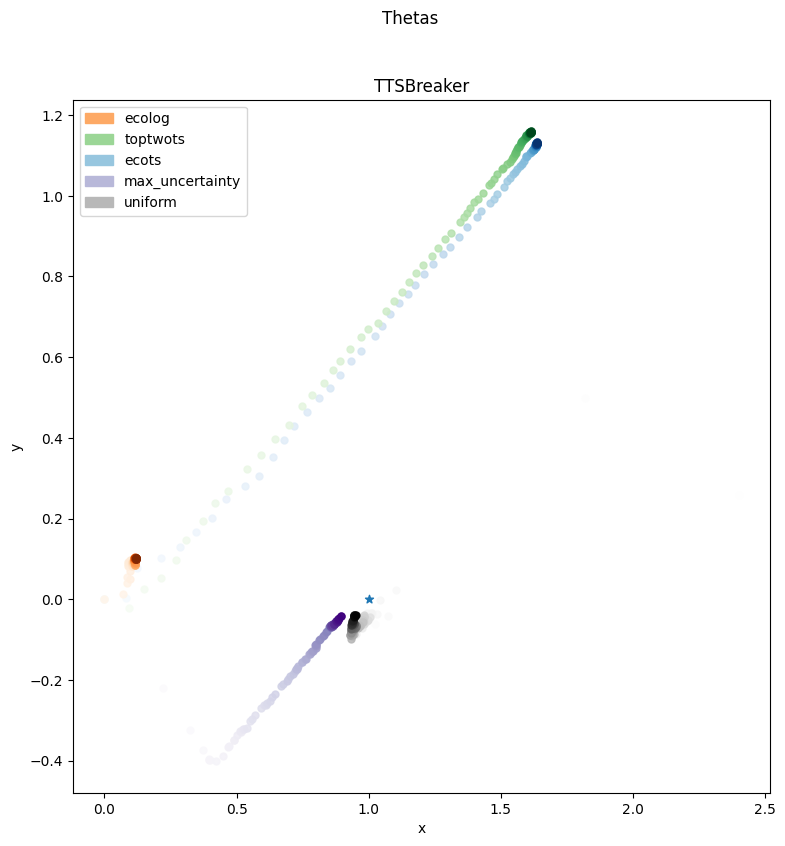

In [5]:
experiment.interact(n_steps=1000, n_runs=50, log_progress=True)